<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from time import time
import os
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
%matplotlib inline

In [4]:
coca_df = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')

In [5]:
coca_df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [6]:
quarter = ['Q1','Q2','Q3','Q4']
n = coca_df['Quarter'][0]

In [7]:
n

'Q1_86'

In [8]:
n[0:2]

'Q1'

In [9]:
n[0]

'Q'

In [10]:
n[2]

'_'

In [11]:
coca_df['quarter'] = 0

In [12]:
coca_df

,Quarter,Sales,quarter
0,Q1_86,1734.827000,0
1,Q2_86,2244.960999,0
2,Q3_86,2533.804993,0
3,Q4_86,2154.962997,0
4,Q1_87,1547.818996,0
5,Q2_87,2104.411995,0
6,Q3_87,2014.362999,0
7,Q4_87,1991.746998,0
8,Q1_88,1869.049999,0
9,Q2_88,2313.631996,0


In [13]:
for i in range(42):
  n=coca_df['Quarter'][i]
  coca_df['quarter'][i]=n[0:2]
   


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
coca_df

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [15]:
dummy = pd.DataFrame(pd.get_dummies(coca_df['quarter']))

In [16]:
coca = pd.concat((coca_df,dummy),axis=1)

In [17]:
coca

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [18]:
t = np.arange(1,43)
coca['t']=t
coca['t_square'] = coca['t']*coca['t']

In [19]:
coca

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100


In [20]:
log_sales =np.log(coca['Sales'])

In [21]:
coca['log_sales'] = log_sales

In [22]:
coca

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [23]:
train = coca.head(37)

In [24]:
train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [25]:
test = coca.tail(5)

In [26]:
test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_sales
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


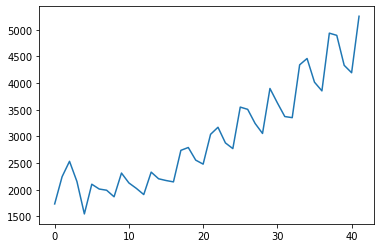

In [27]:
coca.Sales.plot()

In [28]:
import statsmodels.formula.api as smf

In [29]:
linear = smf.ols('Sales~t',data=train).fit()
pred1 = linear.predict(test['t'])

In [30]:
pred1

37    3980.706572
38    4044.908996
39    4109.111420
40    4173.313844
41    4237.516269
dtype: float64

In [31]:
rmse1 = np.sqrt(np.mean((pred1-test['Sales'])**2))

In [32]:
rmse1

737.1568992951951

In [33]:
quadratic = smf.ols('Sales~t+t_square',data=train).fit()
pred2 = quadratic.predict(test[['t','t_square']])
rmse2 = np.sqrt(np.mean((pred2-test['Sales'])**2))


In [34]:
rmse2

445.8029895177927

In [35]:
expo = smf.ols('log_sales~t',data=train).fit()
pred3 = expo.predict(test['t'])
rmse3 = np.sqrt(np.mean((np.exp(pred3)-test['Sales'])**2))

In [36]:
rmse3

586.8646090003102

In [37]:
addi = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred4 = addi.predict(test[['Q1','Q2','Q3','Q4']])
rmse4 = np.sqrt(np.mean((pred4-test['Sales'])**2))

In [38]:
rmse4

1931.36279040632

In [39]:
addi_l = smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred5 = addi_l.predict(test[['Q1','Q2','Q3','Q4','t']])
rmse5 = np.sqrt(np.mean((pred5-test['Sales'])**2))

In [40]:
rmse5

572.3530370243457

In [41]:
addi_qua = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred6 = addi_qua.predict(test[['Q1','Q2','Q3','Q4','t','t_square']])
rmse6 = np.sqrt(np.mean((pred6-test['Sales'])**2))

In [42]:
rmse6

252.2557608176047

In [43]:
mul = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred7 = mul.predict(test[['Q1','Q2','Q3','Q4']])
rmse7 = np.sqrt(np.mean((np.exp(pred7)-test['Sales'])**2))

In [44]:
rmse7

2023.7328645103598

In [45]:
mul_l = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred8 = mul_l.predict(test[['Q1','Q2','Q3','Q4','t']])
rmse8 = np.sqrt(np.mean((np.exp(pred8)-test['Sales'])**2))

In [46]:
rmse8

290.26847888864995

In [47]:
mul_qua = smf.ols('log_sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred9 = mul_qua.predict(test[['Q1','Q2','Q3','Q4','t','t_square']])
rmse9 = np.sqrt(np.mean((np.exp(pred9)-test['Sales'])**2))

In [48]:
rmse9

594.3833855598255

In [49]:
data = {'linear':[rmse1], 'quad':[rmse2],'expo':[rmse3],'addi_sea':[rmse4],'addi_l':[rmse5],'addi_qua':[rmse6],'mul_sea':[rmse7],'mul_l':[rmse8],'mul_qua':[rmse9]}

In [50]:
rmse_df = pd.DataFrame(data)

In [51]:
rmse_df

,linear,quad,expo,addi_sea,addi_l,addi_qua,mul_sea,mul_l,mul_qua
0,737.156899,445.80299,586.864609,1931.36279,572.353037,252.255761,2023.732865,290.268479,594.383386


In [52]:
rdf = data = {'linear':[rmse1], 'quad':[rmse2],'expo':[rmse3],'addi_sea':[rmse4],'addi_l':[rmse5],'addi_qua':[rmse6],'mul_sea':[rmse7],'mul_l':[rmse8],'mul_qua':[rmse9]}

In [53]:
pd.DataFrame(rdf)

,linear,quad,expo,addi_sea,addi_l,addi_qua,mul_sea,mul_l,mul_qua
0,737.156899,445.80299,586.864609,1931.36279,572.353037,252.255761,2023.732865,290.268479,594.383386


In [54]:
rmse_df = {'Models':['linear','quad','expo','addi_sea','addi_lin','addi_quad','mul_sea','mul_lin','mul_quad'],'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8,rmse9]}

In [55]:
rdf = pd.DataFrame(rmse_df)

In [56]:
rdf

,Models,RMSE
0,linear,737.156899
1,quad,445.802990
2,expo,586.864609
3,addi_sea,1931.362790
4,addi_lin,572.353037
5,addi_quad,252.255761
6,mul_sea,2023.732865
7,mul_lin,290.268479
8,mul_quad,594.383386


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


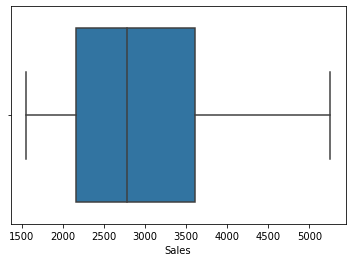

In [57]:
sns.boxplot(coca['Sales'])

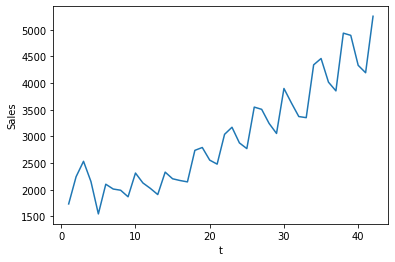

In [58]:
sns.lineplot(x='t',y='Sales',data=coca)

In [59]:
import statsmodels.api as sa
import statsmodels.graphics.tsaplots as tsa

In [60]:
import statsmodels.tsa.statespace as sts

In [61]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing,Holt

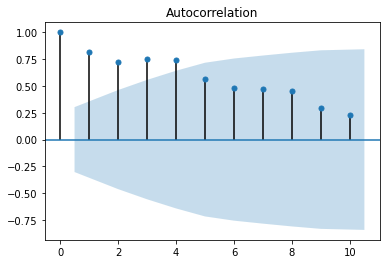

In [62]:
tsa.plot_acf(coca['Sales'],lags=10);

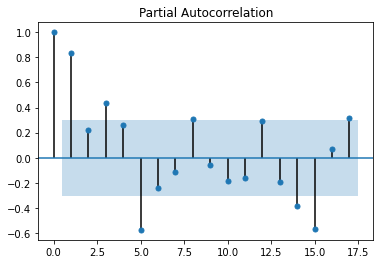

In [63]:
tsa.plot_pacf(coca['Sales']);

In [64]:
Train = coca.head(48)

In [65]:
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [66]:
Test = coca.tail(12)

In [67]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_sales
30,Q3_93,3629.0,Q3,0,0,1,0,31,961,8.196712
31,Q4_93,3373.0,Q4,0,0,0,1,32,1024,8.123558
32,Q1_94,3352.0,Q1,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015


In [68]:
def MAPE(pred,org):
  per = np.abs((pred-org)*100)/org
  return(np.mean(per))

In [69]:
ses_model = SimpleExpSmoothing(Train['Sales']).fit()
pred_ses = ses_model.predict(start=Test.index[0], end=Test.index[-1])
MAPE(pred_ses,Test.Sales)

9.765071349339516

In [70]:
holt_model = Holt(Train['Sales']).fit()
pred_holt = holt_model.predict(start=Test.index[0], end=Test.index[-1])
MAPE(pred_holt,Test.Sales)

9.78507954478971

In [71]:
holt_model_add = ExponentialSmoothing(Train['Sales'],seasonal='add',trend='add',damped=True,seasonal_periods=4).fit()
pred_holt_add = holt_model_add.predict(start=Test.index[0], end=Test.index[-1])
MAPE(pred_holt_add,Test.Sales)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


3.1086442709947097

In [72]:
holt_model_mul = ExponentialSmoothing(Train['Sales'],seasonal='mul',trend='add',damped=True,seasonal_periods=4).fit()
pred_holt_mul = holt_model_mul.predict(start=Test.index[0], end=Test.index[-1])
MAPE(pred_holt_mul,Test.Sales)

2.359347055250558

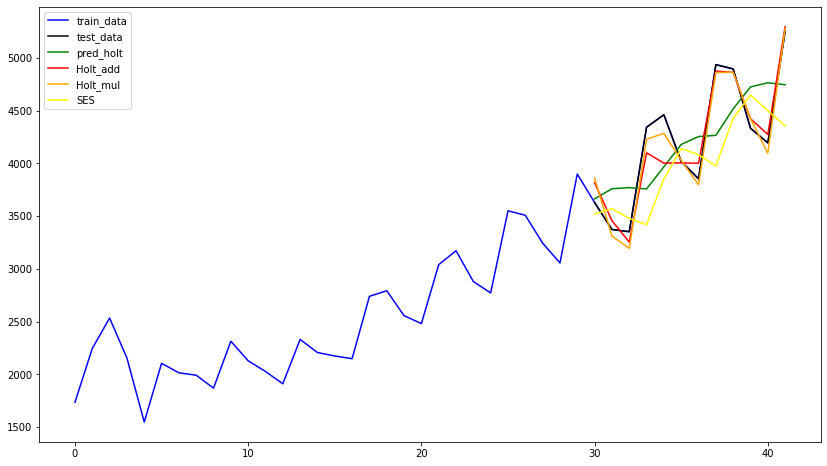

In [73]:
from numpy.ma.core import size
plt.figure(figsize=(14,8))
plt.plot(Train.index,Train['Sales'],label='train_data',color='blue')
plt.plot(Test.index,Test['Sales'],label='test_data',color='black')
plt.plot(pred_holt.index, pred_holt, label='pred_holt',color='green')
plt.plot(pred_holt_add.index,pred_holt_add,label='Holt_add',color='red')
plt.plot(pred_holt_mul.index,pred_holt_mul,label='Holt_mul',color='orange')
plt.plot(pred_ses.index,pred_ses,label='SES',color='yellow')
plt.legend(loc='best')
plt.show()

In [74]:
pred_holt_add

30    3816.257606
31    3456.590667
32    3253.129533
33    4099.470704
34    4002.448667
35    4004.505562
36    4001.321582
37    4874.532665
38    4862.377719
39    4423.736626
40    4273.776257
41    5295.524828
dtype: float64

In [75]:
ses_model.predict(start=Train.index[37],end=Train.index[41])

37    3974.542332
38    4428.206661
39    4648.463355
40    4499.611797
41    4355.408703
dtype: float64

Airline passenger dataset

In [76]:
from matplotlib.pylab import rcParams

In [77]:
rcParams['figure.figsize']= 10,6


In [78]:
df_air = pd.read_excel('/content/Airlines+Data.xlsx')

In [79]:
df_air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [80]:
df_air.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [81]:
df_air['Month'] = pd.to_datetime(df_air['Month'],infer_datetime_format=True)
new_df = df_air.set_index(['Month'])

In [82]:
new_df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [83]:
from datetime import datetime
new_df['1995-03']
new_df['1995-03':'1995-06']
new_df['1995']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
1995-07-01,148
1995-08-01,148
1995-09-01,136


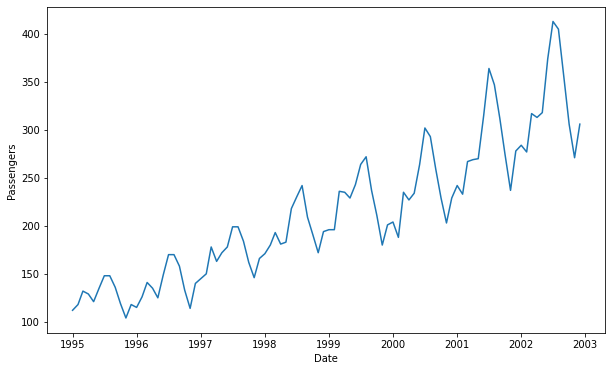

In [84]:
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(new_df)

In [85]:
rol_mean = new_df.rolling(window=12).mean()

In [86]:
rol_std = new_df.rolling(window=12).std()

In [87]:
print(rol_mean,'\n',rol_std)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns] 
             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


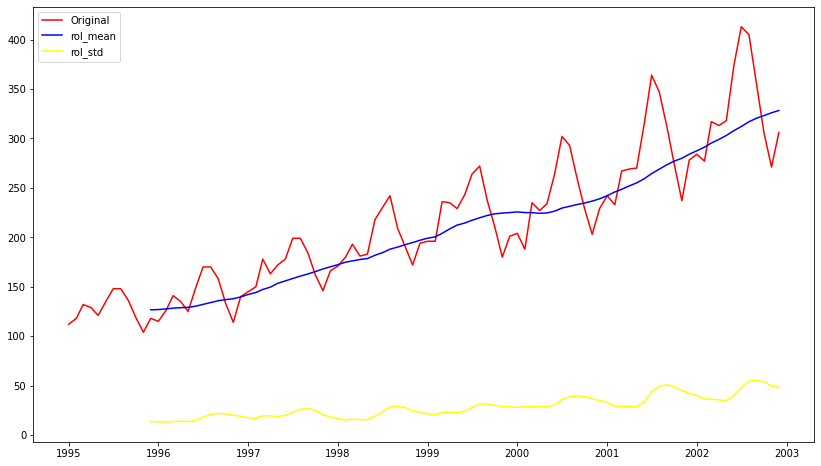

In [88]:
plt.figure(figsize=(14,8))
plt.plot(new_df,label='Original',color='red')
plt.plot(rol_mean,label='rol_mean',color='blue')
plt.plot(rol_std,label='rol_std',color='yellow')
plt.legend(loc='best')
plt.show()

In [89]:
print('results of dickey fuller test')
dftest = adfuller(new_df['Passengers'], autolag='AIC')

results of dickey fuller test


In [90]:
dftest


(1.3402479596467076,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '10%': -2.5857126912469153,
  '5%': -2.8970475206326833},
 626.0084713813505)

In [91]:
dfoutput = pd.Series(dftest[0:4], index=['test_statistic','p-value','lags','No_of_obs'])

In [92]:
dfoutput

test_statistic     1.340248
p-value            0.996825
lags              12.000000
No_of_obs         83.000000
dtype: float64

In [93]:
for key , value in dftest[4].items():
   dfoutput['critical_value(%s)'%key]=value
print(dfoutput)

test_statistic          1.340248
p-value                 0.996825
lags                   12.000000
No_of_obs              83.000000
critical_value(1%)     -3.511712
critical_value(5%)     -2.897048
critical_value(10%)    -2.585713
dtype: float64


In [94]:
new_df_log = np.log(new_df)

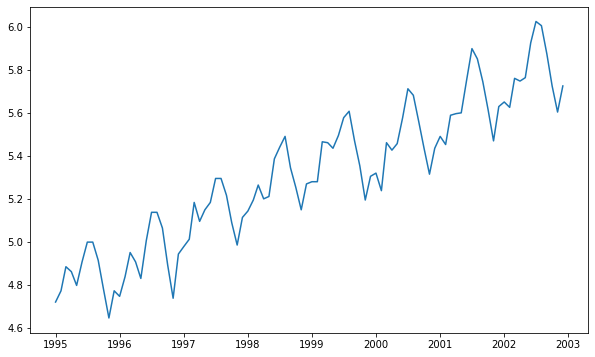

In [95]:
plt.plot(new_df_log)

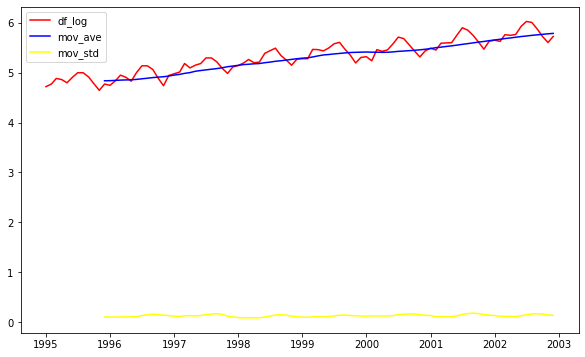

In [96]:
moving_ave = new_df_log.rolling(window=12).mean()
moving_std = new_df_log.rolling(window=12).std()
plt.plot(new_df_log,label='df_log',color='red')
plt.plot(moving_ave,label='mov_ave',color='blue')
plt.plot(moving_std,label='mov_std',color='yellow')
plt.legend(loc='best')
plt.show()

In [97]:
diff_mov_log = new_df_log - moving_ave

In [98]:
diff_mov_log

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
...,...
2002-08-01,0.258591
2002-09-01,0.116062
2002-10-01,-0.041675


In [99]:
diff_mov_log.dropna(inplace=True)

In [100]:
def test_stationary(df):
  roll_mean = df.rolling(window=12).mean()
  roll_std = df.rolling(window=12).std()
  plt.plot(df, label='org',color='blue')
  plt.plot(roll_mean, label='roll_mean', color='red')
  plt.plot(roll_std, label='roll_std',color='yellow')
  plt.legend(loc='best')
  plt.show()
  print('results of dickey fuller test')
  dickey = adfuller(df['Passengers'], autolag='AIC')
  dfout = pd.Series(dickey[0:4], index=['test_statistic','p_value','lags_used','no_of_obs_used'])
  for key,values in dickey[4].items():
    dfout['critical value(%s)'%key]=values
  print(dfout)



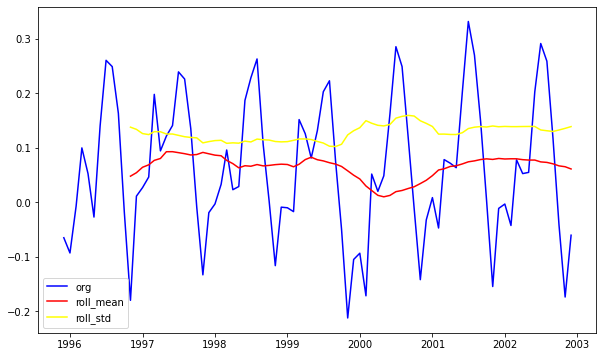

results of dickey fuller test
test_statistic         -1.910930
p_value                 0.326937
lags_used              12.000000
no_of_obs_used         72.000000
critical value(1%)     -3.524624
critical value(5%)     -2.902607
critical value(10%)    -2.588679
dtype: float64


In [101]:
test_stationary(diff_mov_log)

In [102]:
exponen_decay_weigh_avg = new_df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

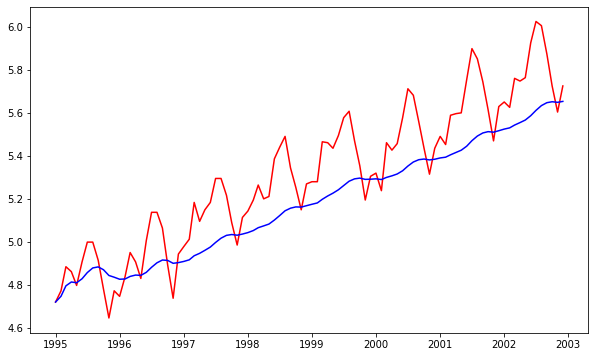

In [103]:
plt.plot(new_df_log, color='red')
plt.plot(exponen_decay_weigh_avg, color='blue')

In [104]:
data_log_diff_expdc = new_df_log-exponen_decay_weigh_avg

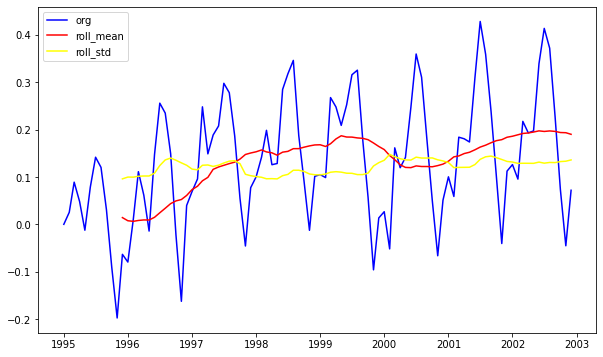

results of dickey fuller test
test_statistic         -2.835036
p_value                 0.053441
lags_used              12.000000
no_of_obs_used         83.000000
critical value(1%)     -3.511712
critical value(5%)     -2.897048
critical value(10%)    -2.585713
dtype: float64


In [105]:
test_stationary(data_log_diff_expdc)

In [106]:
new_df_log.shift()

,Passengers
Month,
1995-01-01,NaN
1995-02-01,4.718499
1995-03-01,4.770685
1995-04-01,4.882802
1995-05-01,4.859812
...,...
2002-08-01,6.023448
2002-09-01,6.003887
2002-10-01,5.872118


In [107]:
new_df_log

,Passengers
Month,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791
...,...
2002-08-01,6.003887
2002-09-01,5.872118
2002-10-01,5.723585


In [108]:
dataset_log_shifting = new_df_log - new_df_log.shift()

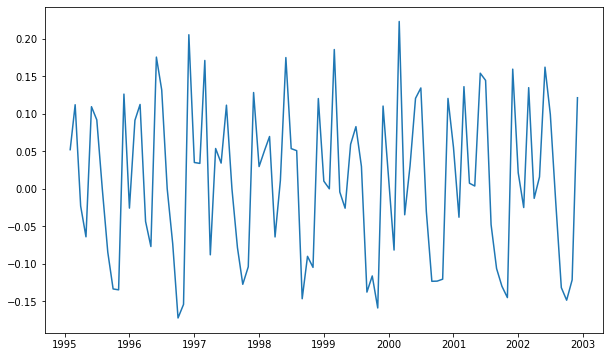

In [109]:
plt.plot(dataset_log_shifting)

In [110]:
dataset_log_shifting.dropna(inplace=True)

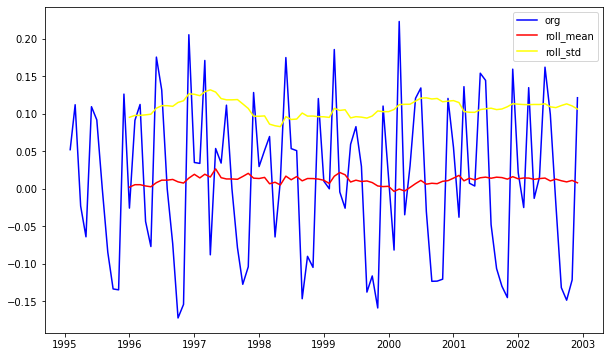

results of dickey fuller test
test_statistic         -2.670823
p_value                 0.079225
lags_used              12.000000
no_of_obs_used         82.000000
critical value(1%)     -3.512738
critical value(5%)     -2.897490
critical value(10%)    -2.585949
dtype: float64


In [111]:
test_stationary(dataset_log_shifting)

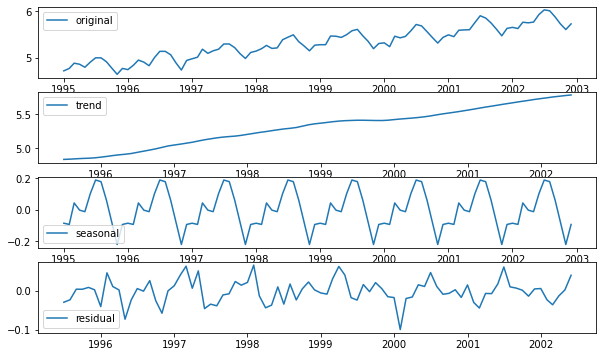

In [113]:
decomposition = seasonal_decompose(new_df_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(new_df_log, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.show()

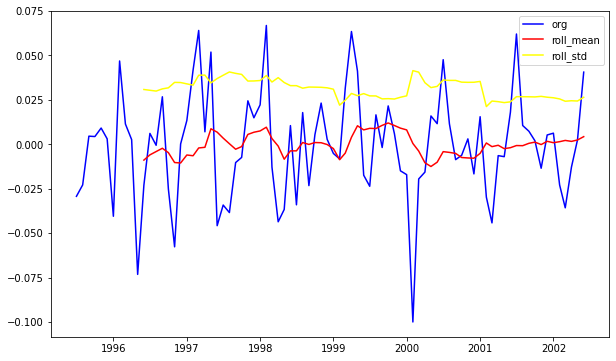

results of dickey fuller test
test_statistic        -5.907863e+00
p_value                2.681970e-07
lags_used              3.000000e+00
no_of_obs_used         8.000000e+01
critical value(1%)    -3.514869e+00
critical value(5%)    -2.898409e+00
critical value(10%)   -2.586439e+00
dtype: float64


In [114]:
decomposed_log_data = residual
decomposed_log_data.dropna(inplace=True)
test_stationary(decomposed_log_data)

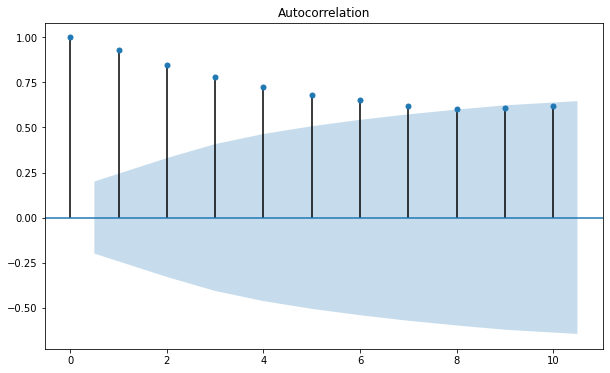

In [115]:
tsa.plot_acf(new_df_log['Passengers'], lags = 10);


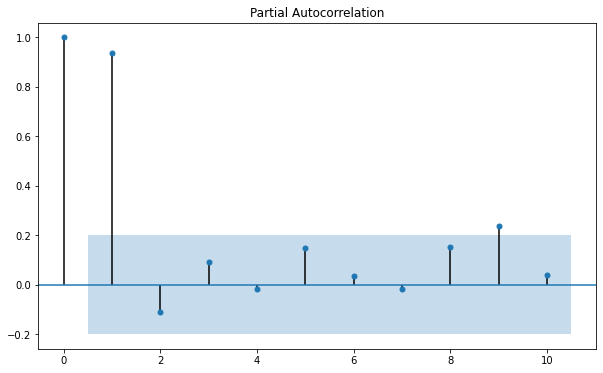

In [116]:
tsa.plot_pacf(new_df_log['Passengers'], lags = 10);

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plot AR model


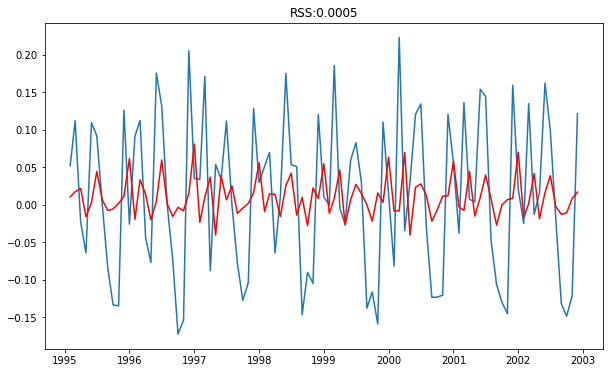

In [118]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(new_df_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(dataset_log_shifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum(results_AR.fittedvalues-dataset_log_shifting['Passengers'])**2)
print('Plot AR model')


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plot MA model


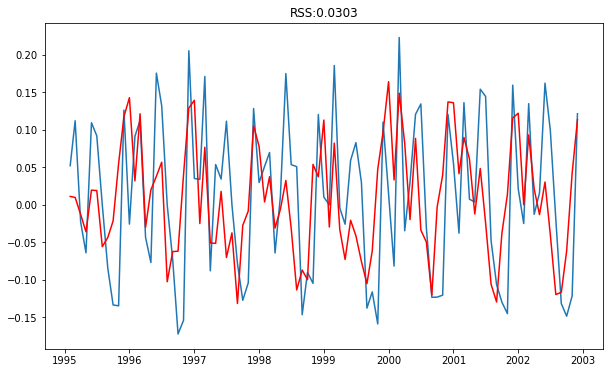

In [119]:
model = ARIMA(new_df_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dataset_log_shifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum(results_MA.fittedvalues-dataset_log_shifting['Passengers'])**2)
print('Plot MA model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plot ARIMA model


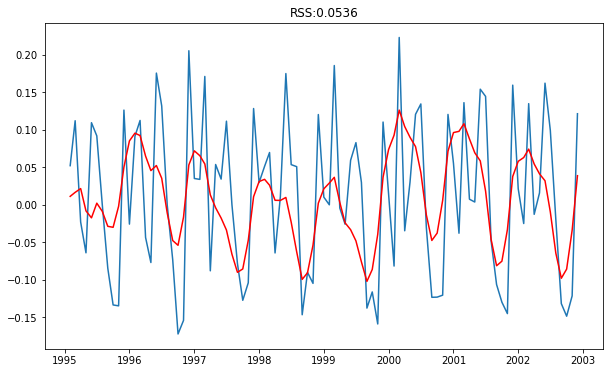

In [120]:
model = ARIMA(new_df_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataset_log_shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum(results_ARIMA.fittedvalues-dataset_log_shifting['Passengers'])**2)
print('Plot ARIMA model')

In [121]:
forecast = results_ARIMA.fittedvalues

In [122]:
forecast

Month
1995-02-01    0.011260
1995-03-01    0.016603
1995-04-01    0.021664
1995-05-01   -0.008106
1995-06-01   -0.017403
                ...   
2002-08-01   -0.064432
2002-09-01   -0.097939
2002-10-01   -0.085748
2002-11-01   -0.034012
2002-12-01    0.038829
Length: 95, dtype: float64

In [123]:
np.exp(forecast)

Month
1995-02-01    1.011324
1995-03-01    1.016742
1995-04-01    1.021900
1995-05-01    0.991927
1995-06-01    0.982748
                ...   
2002-08-01    0.937599
2002-09-01    0.906705
2002-10-01    0.917825
2002-11-01    0.966560
2002-12-01    1.039592
Length: 95, dtype: float64

In [124]:
pred_Arima_cumsum = forecast.cumsum()

In [125]:
pred_ARIMA_log = pd.Series(new_df_log['Passengers'], new_df_log['Passengers'].index)
pred_arima_log = pred_ARIMA_log.add(pred_Arima_cumsum,fill_value=0)
pred_arima_log.head(19)


Month
1995-01-01    4.718499
1995-02-01    4.781945
1995-03-01    4.910665
1995-04-01    4.909339
1995-05-01    4.837212
1995-06-01    4.929293
1995-07-01    5.023392
1995-08-01    5.014652
1995-09-01    4.901397
1995-10-01    4.737874
1995-11-01    4.601209
1995-12-01    4.777876
1996-01-01    4.837360
1996-02-01    5.024234
1996-03-01    5.229074
1996-04-01    5.250546
1996-05-01    5.219189
1996-06-01    5.447181
1996-07-01    5.614432
dtype: float64

Text(0.5, 1.0, 'RMSE:221.0074')

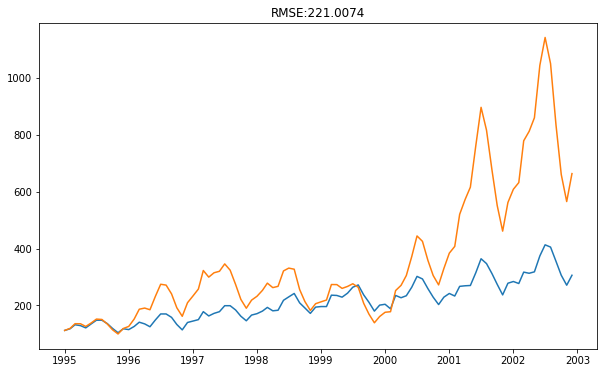

In [126]:
predictions_arima = np.exp(pred_arima_log)
plt.plot(new_df)
plt.plot(predictions_arima)
plt.title('RMSE:%.4f'% np.sqrt(np.mean((predictions_arima-new_df['Passengers'])**2)))

In [127]:
predictions_arima

Month
1995-01-01     112.000000
1995-02-01     119.336188
1995-03-01     135.729640
1995-04-01     135.549828
1995-05-01     126.117200
                 ...     
2002-08-01    1049.856544
2002-09-01     834.389969
2002-10-01     660.119046
2002-11-01     565.065678
2002-12-01     663.306235
Length: 96, dtype: float64